In [ ]:
!pip install fastbook
import fastbook
from fastbook import*

     |████████████████████████████████| 727kB 16.7MB/s 
     |████████████████████████████████| 194kB 61.0MB/s 
     |████████████████████████████████| 1.2MB 41.4MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


**Collab Learner**

In [ ]:
from fastai.collab import*
path=untar_data(URLs.ML_SAMPLE) 
#unzip's or untar's the data from the URL
data_loader_collab= CollabDataLoaders.from_csv('/content/songsDataset.csv')
#Loads data from the file in given path
train_collab=collab_learner(data_loader_collab,y_range=(1,5)) #y_range is used to provide the range in which the prediction can be
#train the data
train_collab.fine_tune(5)

epoch,train_loss,valid_loss,time
0,2.375698,2.356834,05:21


epoch,train_loss,valid_loss,time
0,2.157076,2.302889,05:20
1,1.954571,2.207693,05:18
2,1.652269,2.153194,05:18
3,1.424339,2.134776,05:19


In [ ]:
train_collab.show_results()

,userId,movieId,rating,rating_pred
0,18.0,46.0,1.5,3.292354
1,24.0,32.0,3.5,3.142697
2,100.0,22.0,5.0,3.523743
3,73.0,78.0,3.0,3.087869
4,84.0,37.0,3.0,3.300176
5,24.0,23.0,3.5,3.091569
6,61.0,74.0,4.0,3.168946
7,1.0,59.0,5.0,3.473531
8,26.0,94.0,1.5,3.492800


In [ ]:
print(os.listdir(untar_data(URLs.PASCAL_2007)/'train'))


['005951.jpg', '004085.jpg', '006033.jpg', '002208.jpg', '000130.jpg', '006506.jpg', '004682.jpg', '003868.jpg', '003798.jpg', '002994.jpg', '009717.jpg', '002481.jpg', '004776.jpg', '006636.jpg', '003923.jpg', '005093.jpg', '008688.jpg', '009954.jpg', '009586.jpg', '003047.jpg', '005805.jpg', '000831.jpg', '005640.jpg', '002142.jpg', '007361.jpg', '001875.jpg', '008083.jpg', '008521.jpg', '007897.jpg', '004025.jpg', '000579.jpg', '003681.jpg', '005585.jpg', '007334.jpg', '001782.jpg', '005159.jpg', '004339.jpg', '007650.jpg', '004618.jpg', '007642.jpg', '004438.jpg', '003751.jpg', '007212.jpg', '008317.jpg', '007624.jpg', '002751.jpg', '003784.jpg', '006736.jpg', '005222.jpg', '007857.jpg', '000164.jpg', '009524.jpg', '002559.jpg', '008376.jpg', '001226.jpg', '000859.jpg', '001130.jpg', '002544.jpg', '007280.jpg', '003599.jpg', '006135.jpg', '003417.jpg', '008502.jpg', '000862.jpg', '005674.jpg', '002938.jpg', '001299.jpg', '006622.jpg', '004224.jpg', '006159.jpg', '004264.jpg', '0052

In [ ]:
valid = pd.read_csv('/content/diabetes2.csv') 
valid.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**CNN Learner**

In [ ]:
def is_Tigerlilly(x):
  a=int(x[6:].split('.')[0])
  if a>480 and a<561:
    return True
  else: 
    return False


def is_dog(x): return x[0].islower()

In [ ]:
from fastai.vision.all import*
path=untar_data(URLs.FLOWERS)/'jpg'
data_loader=ImageDataLoaders.from_name_func(path,get_image_files(path),valid_pct=0.2,seed=42,label_func=is_Tigerlilly, item_tfms=Resize(224))
#ImageDataLoaders is used as our dataset is of images
#valid_pct is to know how much of data is to be used for training, here 80% of data is used and 20% for validation randomly
#label_func is used to filter images data
#item_tfms is used to resize each item to 224 pixels
#seed is to set random seed to same value every time i.e. same validation set every time 

In [ ]:
train=cnn_learner(data_loader, resnet34, metrics=error_rate)
#resnet34 is a CNN model with 34 layers
#metrics is used to measure quality of metrics prediction using validation data 
train.fine_tune(1)
#fine tunes fits parameters to the model architecture

epoch,train_loss,valid_loss,error_rate,time
0,0.683698,0.158788,0.038485,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.133303,0.060642,0.012217,01:10


In [ ]:
uploader= widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
image=PILImage.create(uploader.data[0])
is_Tigerlilly,_,probability=train.predict(image)
print(is_Tigerlilly)
print(f"Probability it's a Tigerlilly: {probability[1]}")

False
Probability it's a Tigerlilly: 0.02243203856050968


**UNET learner**

In [ ]:
path=untar_data(URLs.CAMVID_TINY)
data_loader_segmentation=SegmentationDataLoaders.from_label_func(path, bs=8,fnames=get_image_files(path/'images'), label_func= lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',codes = np.loadtxt(path/'codes.txt',dtype=str))


In [ ]:
train=unet_learner(data_loader_segmentation,resnet34)
train.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,3.521142,2.246273,00:01


epoch,train_loss,valid_loss,time
0,2.011533,2.053941,00:01


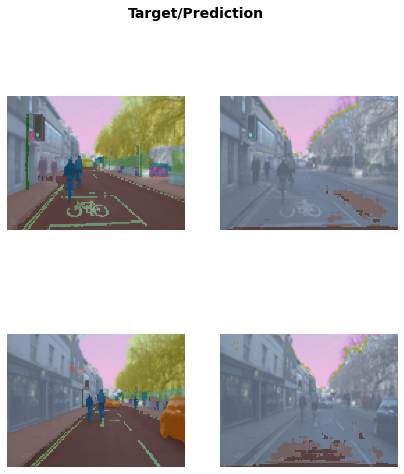

In [ ]:
train.show_results(max_n=9,figsize=(7,8))

**Text classifier Learner**

In [ ]:
from fastai.text.all import*
data_loader_text=TextDataLoaders.from_csv(untar_data(URLs.YELP_REVIEWS_POLARITY),csv_fname='train.csv',text_col=1,label_col=0,bs=16)
#text_col is the input column 
#label_col is the desired outcome  
train_text=text_classifier_learner(data_loader_text, AWD_LSTM , drop_mult=0.5, metrics=accuracy)
train_text.fine_tune(1)

In [ ]:
train_text.predict("quality of product is amazing")

('2', tensor(1), tensor([0.4623, 0.5377]))

In [ ]:
train_text.predict("quality of product is worst")

('1', tensor(0), tensor([0.8070, 0.1930]))

**Tabular Learner**

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv('/content/diabetes2.csv', path='/content/diabetes2.csv', y_names='Outcome',
    cont_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
    procs = [Categorify, FillMissing, Normalize])
#y_name is the desired prediction
#const_name are the continuous valued attributes
train_tabular = tabular_learner(dls, metrics=accuracy)
#accuarcy metric is to be calculated 
train_tabular.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.255324,0.250001,0.673203,00:00
1,0.219418,0.182150,0.673203,00:00
2,0.194883,0.167907,0.673203,00:00
3,0.181172,0.170156,0.673203,00:00
4,0.172371,0.160441,0.673203,00:00
5,0.163457,0.168354,0.673203,00:00
6,0.156388,0.157252,0.673203,00:00
7,0.150660,0.152413,0.673203,00:00
8,0.144468,0.154998,0.673203,00:00
9,0.139682,0.156521,0.673203,00:00


In [ ]:
train_tabular.show_results()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred
0,-0.245603,1.170368,-0.282729,-0.454459,2.727593,-0.095713,-0.518497,-0.790276,0.0,0.342293
1,0.646401,-0.215574,0.976118,-1.275196,-0.684658,-0.515636,-0.661886,2.867280,0.0,0.230917
2,0.646401,1.422358,0.241791,-1.275196,-0.684658,-0.663844,-0.491612,2.867280,0.0,0.503740
3,-0.840273,-1.570018,-0.387633,-1.275196,-0.684658,-1.256676,-0.157038,-0.616106,0.0,-0.110355
4,1.241071,1.894838,-0.072921,0.997613,3.679849,-0.231571,0.437428,2.344772,1.0,0.937068
5,-0.542938,-0.656556,-0.177825,-0.012524,0.108889,0.114248,1.190219,-0.441937,1.0,0.199950
6,0.943736,-0.373067,0.556502,0.681945,-0.684658,0.484768,1.966908,0.864333,1.0,0.699656
7,-0.840273,-0.562060,0.556502,-0.580726,0.038351,-1.553092,0.067007,-0.964445,0.0,-0.016295
8,0.349066,0.508896,2.025156,-1.275196,-0.684658,2.078004,-0.721631,0.341825,1.0,0.662645


**collab Learner**

In [ ]:
from fastai.collab import*
path='/content/songsDataset.csv'
data_loader_collab=CollabDataLoaders.from_csv(path)
train_collab= collab_learner(data_loader_collab, y_range=(1,5))#y_range is used to provide the range in which the prediction can be
train_collab.fine_tune(3)
#fit the parameters to the model in three iterations

epoch,train_loss,valid_loss,time
0,2.310013,2.353972,05:19


epoch,train_loss,valid_loss,time
0,2.160244,2.279665,05:19
1,1.901432,2.204562,05:19
2,1.689410,2.191028,05:20


In [ ]:
train_collab.show_results()

,'userID','songID','rating','rating'_pred
0,10853,67757,2,3.071877
1,80005,35810,1,3.276520
2,145059,112278,4,3.239768
3,20447,58479,4,3.482496
4,74778,20597,5,3.105671
5,182458,96278,2,2.921741
6,20040,66183,4,2.935327
7,140712,104620,2,3.200722
8,18278,91509,5,2.946598
